# Project 2 - Cheri Hung

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [224]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

### Step 2: Read in your data set 

In [225]:
#Read in data from source 
df_raw = pd.read_csv("assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [226]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [227]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of possible values for GRE is higher than that of GPA. Therefore a greater possibility for having more deviations.

#### Question 4. Drop data points with missing data


In [228]:
df_valid = df_raw[pd.notnull(df_raw.gre) & pd.notnull(df_raw.gpa) & pd.notnull(df_raw.prestige)]
df_valid.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Use .count() to see if the correct number of data points have been dropped. Compare with the raw data count to see.

#### Question 6. Create box plots for GRE and GPA

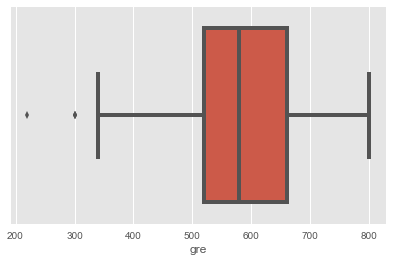

In [229]:
#boxplot 1 for GRE
GRE = df_valid.gre
sns.boxplot(GRE)

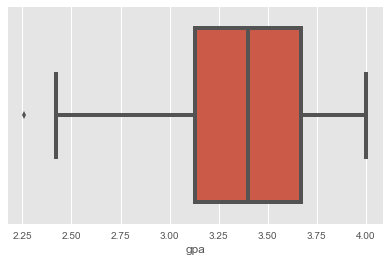

In [230]:
#boxplot 2 for GPA
GPA = df_valid.gpa
sns.boxplot(GPA)

#### Question 7. What do this plots show?

Answer: The boxplots show that both GRE and GPA have a fairly wide range. Both have a small number of outliers. GPA's distribution is skwed left. GRE is also skewing left but only slightly. Both plots show that the middle 50% of each variable is tightly grouped towards a small range.

#### Question 8. Describe each distribution 

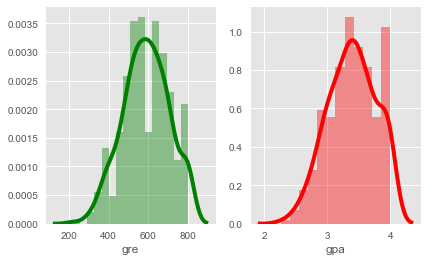

In [231]:
# plot the distribution of each variable 
fig, axs = plt.subplots(ncols=2)
sns.distplot(GRE, color='green', ax=axs[0], norm_hist=True)
sns.distplot(GPA, color='red', ax=axs[1], norm_hist=True)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. The distributions are skewed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: We may want to normalize the data to be able to compare the two variables on an intuitive level, looking at standard deviation. But I feel that since the dataset itself is not very large, maybe including more data (from previous years) would become more normalized if we could access more. Though that does give us another problem with a time effect. If we were to normalize the distribution, we can either use a z-score normalizing ((data - data mean)/data standard deviation) or min-max scaling ((data - data min)/data max - data min). Or use sklearn to normalize the data.

#### Question 11. Which of our variables are potentially colinear? 

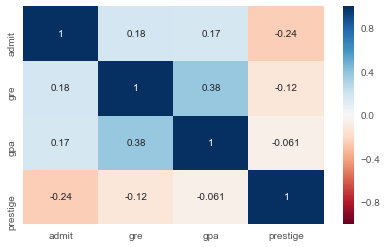

In [232]:
# create a correlation matrix for the data
df_corr = df_valid.corr()[df_valid.corr() != 1]
sns.heatmap(df_valid.corr(), annot=True, cmap='RdBu')

#### Question 12. What did you find?

Answer: No variable has an overwhelming colinearity (-1 or 1) with each other or with admit. That GRE and GPA both have almost the same colinearity with the admit outcome. Compartively, presitge has a higher colinearity value than GRE and GPA to admit and has little colinearity with those two variables.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1. Create two samples from the prestige data. One group is of all the students admitted. And one group is of all those who were not admitted. 
2. Use boxplots to see how the two groups' distributions compares to each other. And then compare with the distribution of all students. Look at the median value of each distribution. 
3. Try to draw some conclusion from that.

#### Question 14. What is your hypothesis? 

Answer: Prestige ratings have a positive correlation to being admitted.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

A quicker way but less specified way to drop any row with null value is to use the dropna() function.

In [233]:
df_dropped = df_raw.dropna()
print df_dropped.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64


#### 2. Bonus: Log transform the skewed data

In [234]:
df_normalized = df_dropped.drop('admit', 1)
#df_normalized = np.log(df.gre)
skewed_cols = ['gre','gpa']
df_normalized[skewed_cols] = df_normalized[skewed_cols].apply(lambda x: np.log(x))
df_normalized.head()

,gre,gpa,prestige
0,5.940171,1.283708,3.0
1,6.492240,1.300192,3.0
2,6.684612,1.386294,1.0
3,6.461468,1.160021,4.0
4,6.253829,1.075002,4.0


#### 3. Advanced: Impute missing data

In [235]:
#look at what data are missing (using not normalized data)
df_allNull = df_raw[df_raw.isnull().any(axis=1)]
print df_allNull

     admit    gre   gpa  prestige
187      0    NaN   NaN       2.0
212      0    NaN  2.87       2.0
236      1  660.0   NaN       NaN


In [298]:
# one way to do it is to manually calculate the values to use as filler
greToFill = df_dropped.gre.mean()
gpaToFill = df_dropped.gpa.median()
presToFill = df_dropped.prestige.median()
print 'GRE mean to use for fill: ', greToFill
print 'GPA median to use for fill:', gpaToFill
print 'Prestige median to use for fill:', presToFill

df_filled = df_raw.copy(deep=True)
df_filled['gre'].fillna(greToFill, inplace=True)
df_filled['gpa'].fillna(gpaToFill, inplace=True)
df_filled['prestige'].fillna(presToFill, inplace=True)

#check to see if it worked
print df_filled.iloc[187]
print df_filled.count()

GRE mean to use for fill:  587.858942065
GPA median to use for fill: 3.4
Prestige median to use for fill: 2.0
admit         0.000000
gre         587.858942
gpa           3.400000
prestige      2.000000
Name: 187, dtype: float64
admit       400
gre         400
gpa         400
prestige    400
dtype: int64


In [294]:
#another method trying sklearn library's imputer feature
from sklearn.preprocessing import Imputer

df_filled_1 = df_raw.copy(deep=True)

imp_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp_median = Imputer(missing_values='NaN', strategy='median', axis=0)

df_filled_1['gre'] = pd.DataFrame(imp_mean.fit_transform(df_filled_1['gre'].values.reshape(-1,1)).tolist())
df_filled_1['gpa'] = pd.DataFrame(imp_median.fit_transform(df_filled_1['gpa'].values.reshape(-1,1)).tolist())
df_filled_1['prestige'] = pd.DataFrame(imp_median.fit_transform(df_filled_1['prestige'].values.reshape(-1,1)).tolist())


In [299]:
#check to see if it worked
print df_filled_1.iloc[187]
print df_filled_1.count()

admit         0.000000
gre         588.040201
gpa           3.395000
prestige      2.000000
Name: 187, dtype: float64
admit       400
gre         400
gpa         400
prestige    400
dtype: int64


Both worked and results appear to align to each other.